In [4]:
#pip3 install xgboost
#pip3 install -U scikit-learn
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error


In [20]:
import pandas as pd
installs = pd.read_csv('data/installs.csv.gzip', low_memory=False, compression='gzip', parse_dates = ['created'], index_col=['created'])
installs = installs.sort_index()
installs.head()

,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
created,,,,,,,,,,,,,,,,,
2019-04-18 00:00:01.560,70,1891515180541284343,4432995619177048534,NaN,False,False,6287817205707153877,NaN,NaN,Apsalar-Postback,NaN,NaN,NaN,NaN,NaN,8409380583076227678,NaN
2019-04-18 00:00:01.851,70,1891515180541284343,5904733559638204455,NaN,False,False,6287817205707153877,NaN,NaN,Apsalar-Postback,NaN,NaN,NaN,NaN,NaN,806493034070542041,NaN
2019-04-18 00:00:05.152,65,1891515180541284343,896373747754111825,NaN,False,True,6287817205707153877,3.083059e+17,5.274185e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 9; SM-G9650 Bu...,8c8af5e3-96e7-4a49-9f17-cafa7f300f2c,af_app_opened,False,NaN,6319394158544413414,6.977049e+18
2019-04-18 00:00:05.589,27,1494519392962156891,3399210824535017892,NaN,False,False,6287817205707153877,NaN,6.794880e+18,http-kit/2.0,trivago/216 CFNetwork/978.0.7 Darwin/18.5.0,NaN,NaN,True,NaN,4206683315615624585,5.221863e+18
2019-04-18 00:00:06.795,339,1494519392962156891,1541425881979513687,NaN,False,False,6287817205707153877,NaN,6.794880e+18,http-kit/2.0,TikTok/109005 CFNetwork/758.5.3 Darwin/15.6.0,NaN,NaN,True,NaN,8335834010411202437,7.528974e+18


In [73]:
label1 = installs['2019-04-21':'2019-04-23'].reset_index().groupby('ref_hash').agg({'created' : 'min'})

In [74]:
label1['created'] = label1['created'] - pd.Timestamp('2019-04-21 00:00:00')
label1['created'] = label1['created'].transform(lambda x: x.total_seconds())

In [75]:
label1 = label1.reset_index()
label1 = label1.merge(installs['2019-04-18':'2019-04-20'].reset_index(),on="ref_hash", how="inner")
label1 = label1.rename(columns={'created_x':'label','created_y':'created'})
label1

,ref_hash,label,created,application_id,ref_type,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2493454867357963,19452.720,2019-04-20 22:22:49.792,158,1891515180541284343,NaN,False,False,6287817205707153877,NaN,1.327864e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,8426419977387901158,3.301378e+18
1,3589607969461633,108671.325,2019-04-18 14:57:36.658,77,1891515180541284343,NaN,False,False,6287817205707153877,NaN,7.060110e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,1036806782641860771,3.301378e+18
2,3589607969461633,108671.325,2019-04-18 16:16:56.283,302,1891515180541284343,NaN,False,False,6287817205707153877,3.083059e+17,7.060110e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J610...,NaN,NaN,False,NaN,1036806782641860771,6.977049e+18
3,3861795021724487,252890.111,2019-04-20 18:13:48.197,339,1494519392962156891,NaN,False,False,6287817205707153877,NaN,6.794880e+18,http-kit/2.0,TikTok/109005 CFNetwork/978.0.7 Darwin/18.5.0,NaN,NaN,True,NaN,8499290145871692375,8.441417e+18
4,6455321535851721,217290.613,2019-04-19 03:30:32.429,94,1891515180541284343,NaN,False,False,6287817205707153877,NaN,6.760982e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4458082048655699359,3.301378e+18
5,7944594974253876,220770.040,2019-04-19 17:50:36.108,327,1891515180541284343,NaN,False,False,6287817205707153877,NaN,NaN,Dalvik/2.1.0 (Linux; U; Android 9; SM-N960U1 B...,NaN,NaN,NaN,NaN,NaN,1657122989587830217,NaN
6,14664043499550181,97507.843,2019-04-18 14:53:21.834,94,1891515180541284343,NaN,False,False,6287817205707153877,NaN,2.827096e+17,adjust.com,NaN,NaN,NaN,NaN,NaN,2676767428799963998,3.301378e+18
7,15057990565785689,238575.817,2019-04-19 18:59:14.898,121,1891515180541284343,NaN,False,True,6287817205707153877,4.567867e+18,1.292000e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.0.0; BLADE V...,1eb2938a-29f0-417c-a433-7a39e21f94f3,Open,False,NaN,2936634590955379497,6.977049e+18
8,15057990565785689,238575.817,2019-04-19 18:59:16.926,121,1891515180541284343,NaN,False,False,6287817205707153877,4.567867e+18,1.292000e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.0.0; BLADE V...,NaN,NaN,False,NaN,2936634590955379497,6.977049e+18
9,15695176139879422,239972.035,2019-04-18 06:49:51.272,94,1891515180541284343,NaN,False,False,6287817205707153877,NaN,3.017401e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,1637090004618393412,3.301378e+18


In [77]:
y=label1.loc[:,'label']
y


0        19452.720
1       108671.325
2       108671.325
3       252890.111
4       217290.613
5       220770.040
6        97507.843
7       238575.817
8       238575.817
9       239972.035
10      170757.389
11      243918.623
12       22624.206
13      225764.103
14      225764.103
15      107517.631
16      152442.672
17      152442.672
18       93014.879
19      245073.483
20      166275.213
21       11104.805
22       11104.805
23       11104.805
24        3211.751
25       48230.003
26       48230.003
27       48230.003
28      189169.026
29      103646.069
           ...    
4917    152749.422
4918    188158.560
4919    188158.560
4920    224769.979
4921     56883.456
4922    153368.004
4923    185301.761
4924    150977.707
4925    225539.100
4926     61272.875
4927    185807.476
4928      5038.878
4929     97523.833
4930    226109.082
4931    175652.554
4932    175652.554
4933    246426.227
4934    246426.227
4935     84973.446
4936    147634.249
4937    147634.249
4938    1864

In [103]:
data1=label1.drop('label',axis=1)
data1.head()
#Aca se debe hacer limpieza de los datos... dejar features que sirven y hacer nuevos

,ref_hash,created,application_id,ref_type,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2493454867357963,2019-04-20 22:22:49.792,158,1891515180541284343,NaN,False,False,6287817205707153877,NaN,1.327864e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,8426419977387901158,3.301378e+18
1,3589607969461633,2019-04-18 14:57:36.658,77,1891515180541284343,NaN,False,False,6287817205707153877,NaN,7.060110e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,1036806782641860771,3.301378e+18
2,3589607969461633,2019-04-18 16:16:56.283,302,1891515180541284343,NaN,False,False,6287817205707153877,3.083059e+17,7.060110e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J610...,NaN,NaN,False,NaN,1036806782641860771,6.977049e+18
3,3861795021724487,2019-04-20 18:13:48.197,339,1494519392962156891,NaN,False,False,6287817205707153877,NaN,6.794880e+18,http-kit/2.0,TikTok/109005 CFNetwork/978.0.7 Darwin/18.5.0,NaN,NaN,True,NaN,8499290145871692375,8.441417e+18
4,6455321535851721,2019-04-19 03:30:32.429,94,1891515180541284343,NaN,False,False,6287817205707153877,NaN,6.760982e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4458082048655699359,3.301378e+18


In [104]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4946
Data columns (total 18 columns):
ref_hash              4947 non-null int64
created               4947 non-null datetime64[ns]
application_id        4947 non-null int64
ref_type              4947 non-null int64
click_hash            18 non-null object
attributed            4947 non-null bool
implicit              4947 non-null bool
device_countrycode    4947 non-null int64
device_brand          2814 non-null float64
device_model          4711 non-null float64
session_user_agent    4820 non-null object
user_agent            3174 non-null object
event_uuid            1160 non-null object
kind                  1160 non-null object
wifi                  2923 non-null object
trans_id              93 non-null object
ip_address            4947 non-null int64
device_language       4716 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 826.7+ KB


In [105]:
#Las elimino por ahora... luego se pueden convertir a booleanos para mas features
data1.drop(['ref_type','click_hash','session_user_agent','user_agent','kind','wifi','trans_id','event_uuid'],axis =1, inplace = True )



In [115]:
data1.drop('created',axis=1, inplace = True)

In [116]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4946
Data columns (total 9 columns):
ref_hash              4947 non-null int64
application_id        4947 non-null int64
attributed            4947 non-null bool
implicit              4947 non-null bool
device_countrycode    4947 non-null int64
device_brand          2814 non-null float64
device_model          4711 non-null float64
ip_address            4947 non-null int64
device_language       4716 non-null float64
dtypes: bool(2), float64(3), int64(4)
memory usage: 478.8 KB


In [107]:
y.head(1)

0    19452.72
Name: label, dtype: float64

In [111]:
data1.fillna(0)

,ref_hash,created,application_id,attributed,implicit,device_countrycode,device_brand,device_model,ip_address,device_language
0,2493454867357963,2019-04-20 22:22:49.792,158,False,False,6287817205707153877,0.000000e+00,1.327864e+18,8426419977387901158,3.301378e+18
1,3589607969461633,2019-04-18 14:57:36.658,77,False,False,6287817205707153877,0.000000e+00,7.060110e+18,1036806782641860771,3.301378e+18
2,3589607969461633,2019-04-18 16:16:56.283,302,False,False,6287817205707153877,3.083059e+17,7.060110e+18,1036806782641860771,6.977049e+18
3,3861795021724487,2019-04-20 18:13:48.197,339,False,False,6287817205707153877,0.000000e+00,6.794880e+18,8499290145871692375,8.441417e+18
4,6455321535851721,2019-04-19 03:30:32.429,94,False,False,6287817205707153877,0.000000e+00,6.760982e+18,4458082048655699359,3.301378e+18
5,7944594974253876,2019-04-19 17:50:36.108,327,False,False,6287817205707153877,0.000000e+00,0.000000e+00,1657122989587830217,0.000000e+00
6,14664043499550181,2019-04-18 14:53:21.834,94,False,False,6287817205707153877,0.000000e+00,2.827096e+17,2676767428799963998,3.301378e+18
7,15057990565785689,2019-04-19 18:59:14.898,121,False,True,6287817205707153877,4.567867e+18,1.292000e+18,2936634590955379497,6.977049e+18
8,15057990565785689,2019-04-19 18:59:16.926,121,False,False,6287817205707153877,4.567867e+18,1.292000e+18,2936634590955379497,6.977049e+18
9,15695176139879422,2019-04-18 06:49:51.272,94,False,False,6287817205707153877,0.000000e+00,3.017401e+18,1637090004618393412,3.301378e+18


In [96]:
#deben tener la misma forma para el sampleo

In [112]:
data1.shape

(4947, 10)

In [109]:
y.shape

(4947,)

In [117]:
data_dmatrix = xgb.DMatrix(data=data1,label=y)


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(data1, y, test_size=0.2, random_state=123)

In [119]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [120]:
xg_reg.fit(X_train,y_train)


[00:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#predecimos

In [121]:
preds = xg_reg.predict(X_test)


In [ ]:
#error en las predicciones

In [122]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 83709.380664


In [ ]:
#kfolds cross validation

In [123]:

params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

[00:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [125]:
#resultados

In [124]:
cv_results.head()


,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,130299.125000,1290.714563,130277.679688,559.377521
1,122006.622396,1326.663423,121839.231771,514.651683
2,114811.458333,1350.255660,114497.075521,439.994623
3,108623.812500,1305.970307,108167.239583,360.951091
4,103300.078125,1294.670598,102775.934896,263.441883


In [127]:
#error final

In [126]:
print((cv_results["test-rmse-mean"]).tail(1))


49    76142.34375
Name: test-rmse-mean, dtype: float64


In [129]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[01:00:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


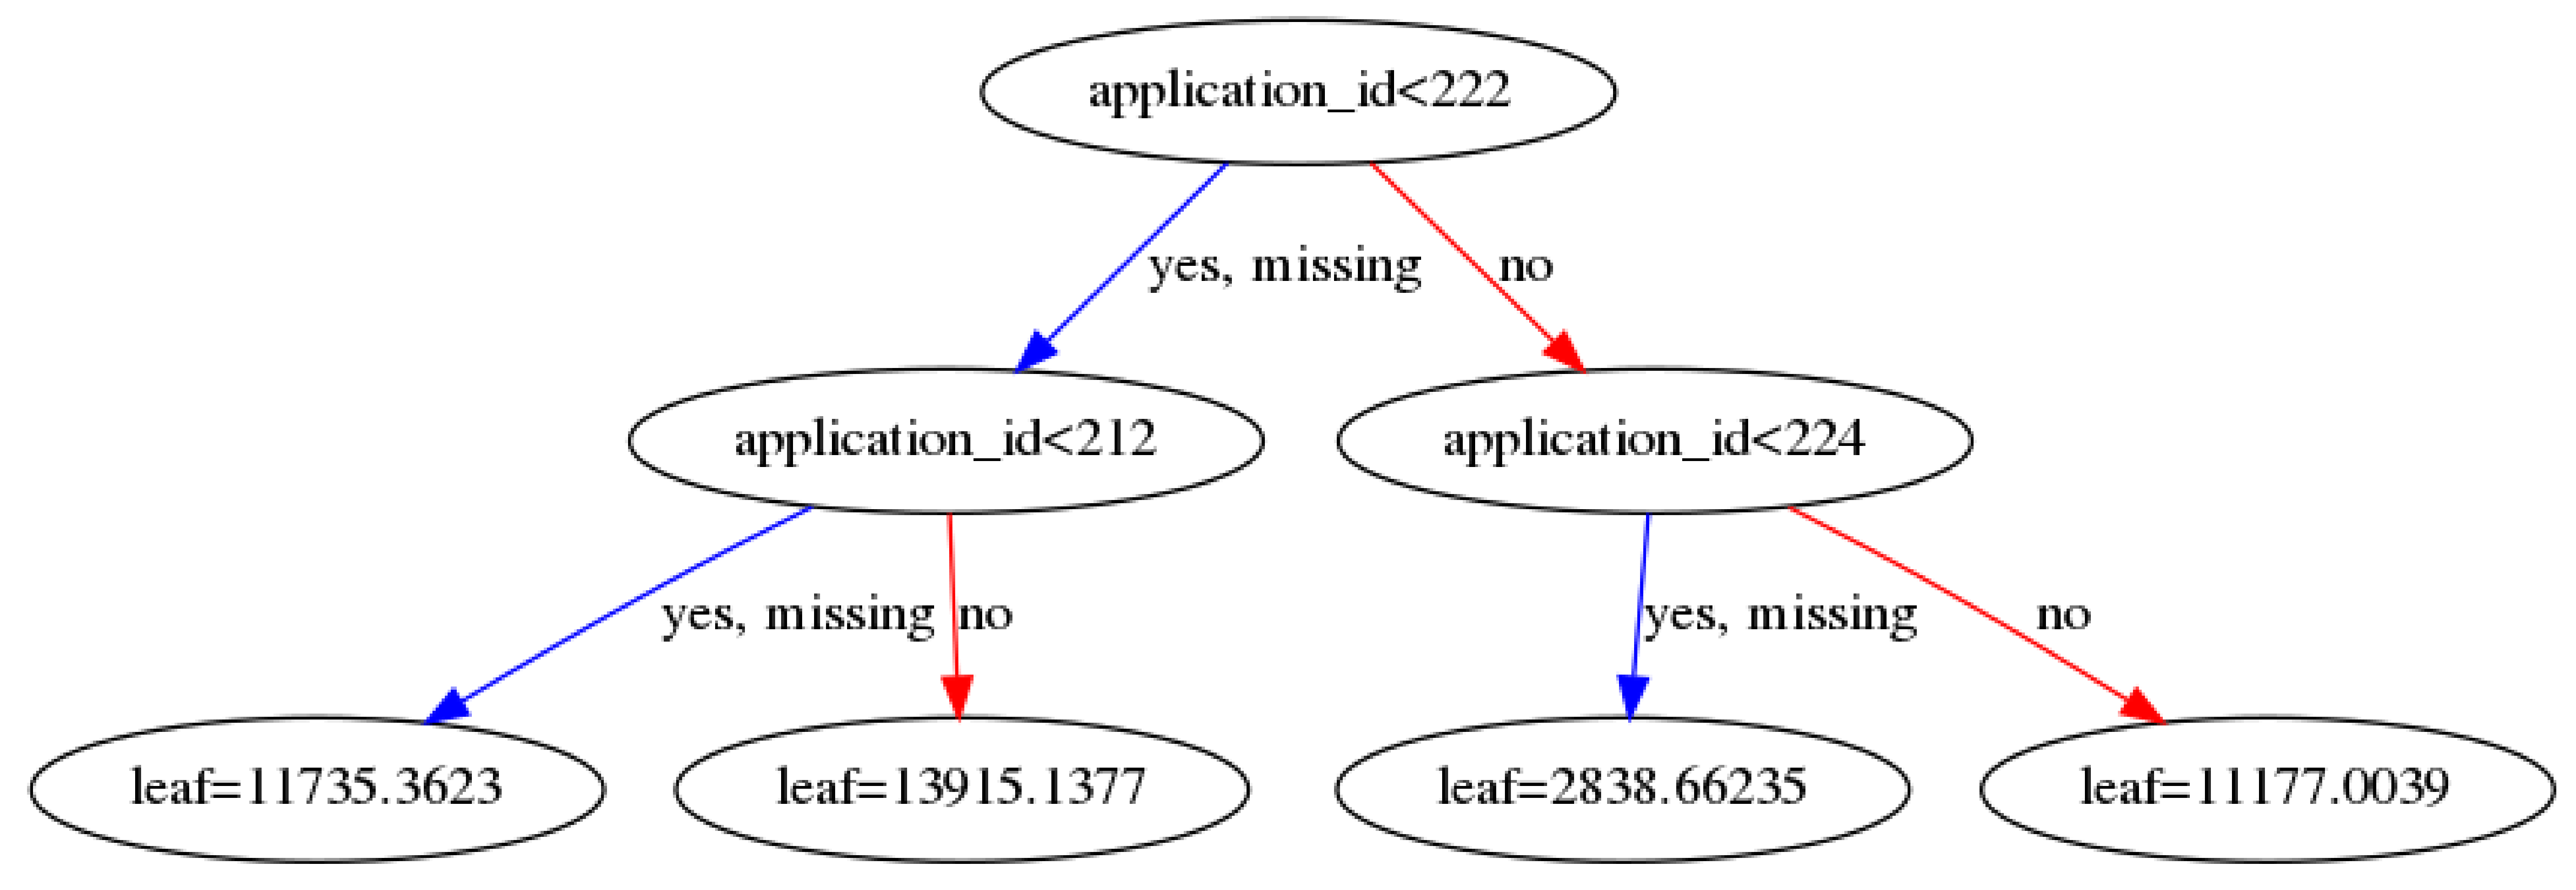

In [134]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [10000, 10000]
plt.show()